In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder
import seaborn as sns

Read Dataset

In [5]:
df = pd.read_csv('F:\\Machine Learning\\CSV file\\bank_marketing_dataset.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [8]:
df.shape

(4521, 17)

In [9]:
df['balance'] = df['balance'].clip(lower=-3000,upper=50000)
df['duration'] = df['duration'].clip(upper=1000)
df['campaign'] = df['campaign'].clip(upper=20)
df['pdays'] = df['pdays'].clip(upper=400)

In [ ]:
import numpy as np

df['balance_log'] = np.log1p(df['balance'] - df['balance'].min()+1)
df['duration_log'] = np.log1p(df['duration'])
df['campaign_log'] = np.log1p(df['campaign'])
df['pdays_log'] = np.log1p(df['pdays'].clip(lower=0))

In [10]:
bins = [-30000,0,1000,5000,20000,50000]
labels = ['very low','low','medium','high','very high']

df['balance_bin'] = pd.cut(df['balance'],bins=bins,labels=labels)

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_bin
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,medium
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,medium
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,medium
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,medium
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,very low


In [17]:
cat_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome','balance_bin','y']

le_dict = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

In [18]:
df.head()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_bin
0,30,10,1,0,0,0,0,0,19,10,79,1,-1,0,3,0,2
1,33,7,1,1,0,1,1,0,11,8,220,1,339,4,0,0,2
2,35,4,2,2,0,1,0,0,16,0,185,1,330,1,0,0,2
3,30,4,1,2,0,1,1,2,3,6,199,4,-1,0,3,0,2
4,59,1,1,1,0,1,0,2,5,8,226,1,-1,0,3,0,4


In [19]:
df.y.unique()

array([0, 1])

In [15]:
df = df.drop(['balance'],axis='columns')

In [16]:
df.head()

,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_bin
0,30,10,1,0,0,0,0,0,19,10,79,1,-1,0,3,no,2
1,33,7,1,1,0,1,1,0,11,8,220,1,339,4,0,no,2
2,35,4,2,2,0,1,0,0,16,0,185,1,330,1,0,no,2
3,30,4,1,2,0,1,1,2,3,6,199,4,-1,0,3,no,2
4,59,1,1,1,0,1,0,2,5,8,226,1,-1,0,3,no,4


<Axes: xlabel='y', ylabel='count'>

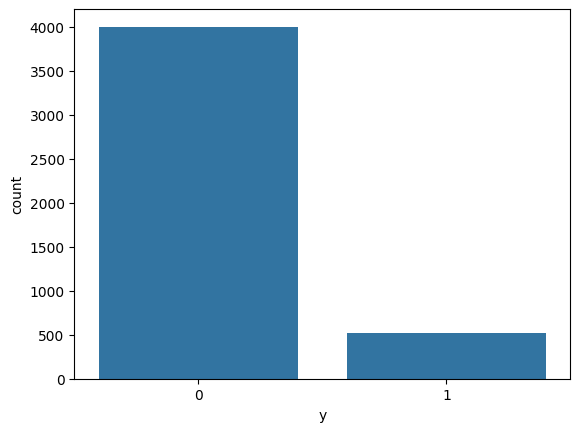

In [20]:
sns.countplot(x='y',data=df)

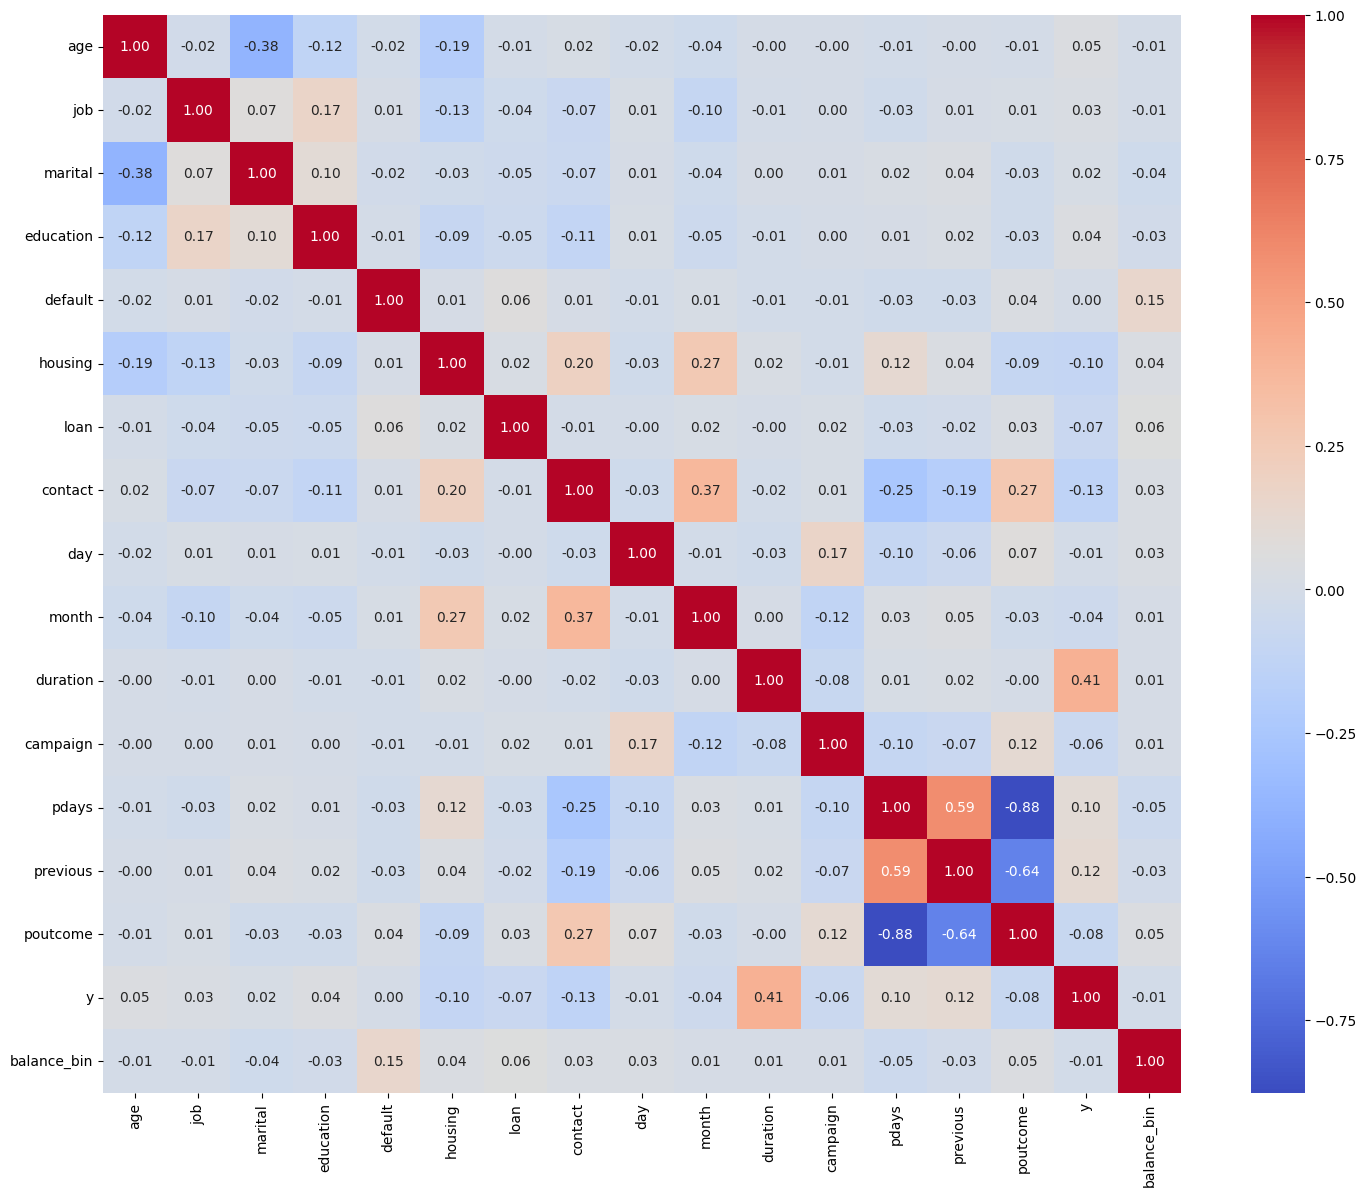

In [21]:
corr_table = df.corr(numeric_only=True)

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',300)
pd.set_option('display.float_format', lambda x: f'{x:.3f}')


plt.figure(figsize=(18,14))
sns.heatmap(corr_table,annot=True,cmap='coolwarm',fmt='.2f',square=True)
plt.show()

In [22]:
corr_matrix = df.corr()

In [23]:
corr_y = corr_matrix['y'].abs().sort_values(ascending=True)
top_features = corr_y[1:6].index
top_features

Index(['day', 'balance_bin', 'marital', 'job', 'month'], dtype='object')

In [24]:
X_top = df[top_features]
y = df['y']

In [29]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42, stratify=y)

In [31]:
scale_pos_weight = (y_train==0).sum() / (y_train==1).sum()

In [32]:
model = XGBClassifier(
    n_estimators = 500,
    max_depth = 6,
    learning_rate = 0.1,
    scale_pos_weight = scale_pos_weight,
    use_label_encoder = False,
    eval_metric = 'logloss'
)

In [33]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


accuracy_score(y_test,y_pred)

0.7977900552486188

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88       801
           1       0.25      0.37      0.29       104

    accuracy                           0.80       905
   macro avg       0.58      0.61      0.59       905
weighted avg       0.84      0.80      0.81       905

